<a href="https://colab.research.google.com/github/ManuelaCastano/CuadernosyEjercicios/blob/main/1PARCIAL_2_SyS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PUNTO 1 Y 2

wo= 1.0
Fo= 1.5707963267948966


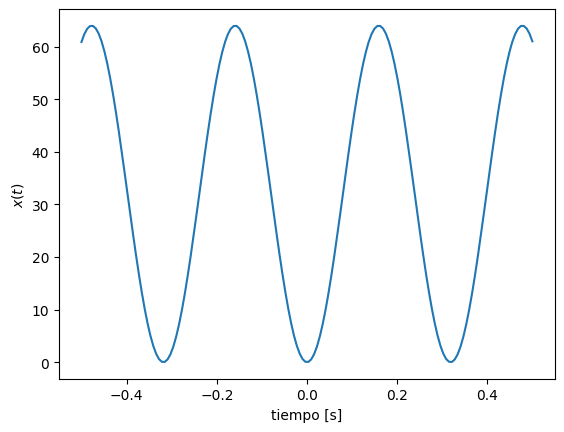

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

A = 8 #amplitud
Fo = 1 #frecuencia fundamental
To = 2*np.pi*Fo #periodo de oscilación
ti = -To/2 #tiempo inicial
tf = To/2 #tiempo final
wo = 2*np.pi/(tf-ti) #frecuencia angular
Fo = wo/2*np.pi #frecuencia fundamental
print('wo=',wo)
print('Fo=',Fo)
Fs = 100*Fo #frecuencia muestreo -> debe respetar Nyquist Fs >= 2 Fo
tv = np.arange(-1/2,1/2,1/Fs) #vector de tiempo

x = abs(A*np.sin(2*np.pi*Fo*tv))**2 #señal de entrada
plt.plot(tv,x) #gráfica de la señal
plt.xlabel('tiempo [s]')
plt.ylabel('$x(t)$')
plt.show()

In [ ]:
#se crean las bases de la serie exponencial compleja de Fourier
T = tf - ti #intervalo de interés
N = 50 #número armonicos a simular
wo = 2*np.pi/T # frecuencia fundamental
# definir bases
phin = np.zeros((len(tv),2*N+1),dtype=np.complex_)#crear matriz para guardar bases
for n in range(-N,N+1,1):
    phin[:,n+N] = np.exp(1j*n*wo*tv)#base de fourier en el intervalo de interés

# graficar bases
from ipywidgets import interact,IntSlider

def pltbase(n=1):
    plt.plot(tv,np.real(phin[:,int(n+N)]),label="Re{$\phi_n$(t)}")
    plt.xlabel("t[s]",fontsize = 14)
    plt.ylabel("$\phi_n$(t)",fontsize = 14)
    plt.plot(tv,np.imag(phin[:,int(n+N)]),label="Im{$\phi_n$(t)}")
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltbase,n=(-N,N,1))

interactive(children=(IntSlider(value=1, description='n', max=50, min=-50), Output()), _dom_classes=('widget-i…

<function __main__.pltbase(n=1)>

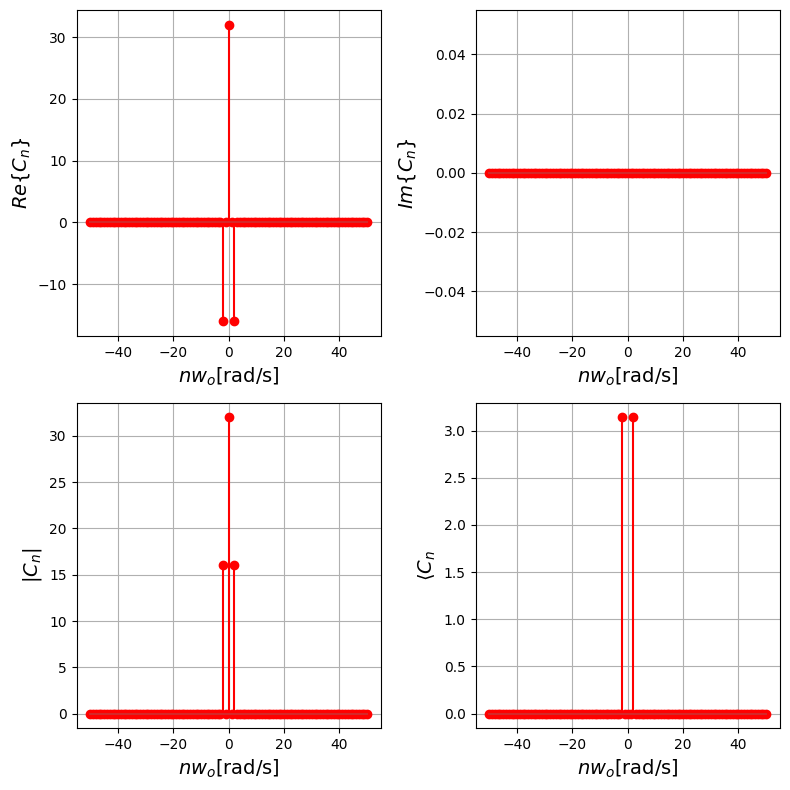

In [ ]:
#calcular espectro -> cambiar según la señal estudiada
cn = np.zeros(2*N+1,dtype=np.complex_)
nv = np.linspace(-N, N, 2*N+1) #vector armónicos
cn[N] = A**2/2 # nivel dc C_0
cn[N-2] = -(A**2/4) #armónico -2
cn[N+2] = -(A**2/4) #armónico +2

#graficar espectro
fig = plt.figure(figsize=(8,8))
plt.subplot(2,2,1)
plt.stem(nv, np.real(cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Re\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,2)
plt.stem(nv, np.imag(cn), 'r')
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$Im\{C_n\}$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,3)
plt.stem(nv, abs(cn), 'r')#magnitud del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$|C_n|$',fontsize = 14)
plt.axis('tight')
plt.grid()

plt.subplot(2,2,4)
plt.stem(nv, np.angle(cn), 'r')#fase del espectro
plt.xlabel(r'$nw_o$[rad/s]',fontsize = 14)
plt.ylabel(r'$\langle C_n$',fontsize = 14)
plt.axis('tight')
plt.grid()

fig.tight_layout()

In [ ]:
#graficar reconstrucción

Px = 3*(A**4)/8 # potencia señal x(t)
def pltest(Na=1):
    ind = range(N-Na,N+Na+1)
    er = 1- np.sum(abs(cn[ind])**2)/Px
    #señal reconstruida
    xe = phin[:,ind].dot(cn[ind] ) # dot calcula el producto entre vectores
    plt.plot(tv,xe,color='b',label='$x_e(t)$') # señal estimada o filtrada
    plt.plot(tv,x,color='r',label='$x(t)$') #señal original
    plt.title('E_r=%.2f[%%]' % (100*er),fontsize=16)
    plt.xlabel('t[s]')
    plt.ylabel('x(t)')
    plt.grid()
    plt.legend()
    plt.show()
    return
interact(pltest,Na=(1,N,1))

interactive(children=(IntSlider(value=1, description='Na', max=50, min=1), Output()), _dom_classes=('widget-in…

<function __main__.pltest(Na=1)>

# PUNTO 3

In [ ]:
#instalar soundfile para cargar .wav
!pip install soundfile

In [ ]:
!pip install yt-dlp

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.1/170.1 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 29.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.3/157.3 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.4/194.4 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.0 MB/s eta 0:00:00


In [ ]:
import yt_dlp
import os
ydl_opts = {
    'format': 'bestaudio[ext=m4a]',
    'outtmpl': 'audio.mp3'
}

with yt_dlp.YoutubeDL(ydl_opts) as ydl:
    ydl.download(['https://www.youtube.com/watch?v=RG8YSMUZ2Nk'])

[youtube] Extracting URL: https://www.youtube.com/watch?v=RG8YSMUZ2Nk
[youtube] RG8YSMUZ2Nk: Downloading webpage
[youtube] RG8YSMUZ2Nk: Downloading ios player API JSON
[youtube] RG8YSMUZ2Nk: Downloading web creator player API JSON
[youtube] RG8YSMUZ2Nk: Downloading player 57c75fa4
[youtube] RG8YSMUZ2Nk: Downloading m3u8 information
[info] RG8YSMUZ2Nk: Downloading 1 format(s): 140
[download] Destination: audio.mp3
[download] 100% of    3.65MiB in 00:00:00 at 13.90MiB/s  
[FixupM4a] Correcting container of "audio.mp3"


In [ ]:
# Convierte a .wav usando ffmpeg
!ffmpeg -i audio.mp3 output.wav

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [ ]:
import soundfile as sf # para instalar pip install soundfile
import numpy as np # para instalar pip install numpy
import matplotlib.pyplot as plt # para instalar pip install matplotlib
from IPython.display import Audio #librería para reproducir audio
#leer archivo wav
nombre_out = "output.wav"
xa, fs = sf.read(nombre_out)
# read speech signal from file
print('Frecuencia de muestreo %.2f[Hz]\naudio %s' % (fs,nombre_out))

Frecuencia de muestreo 44100.00[Hz]
audio output.wav


In [ ]:
xpro = xa.copy() #copiar archivos para procesar
#leer 5 segundos de la canción
ti = 123 #tiempo incio a procesar seg
tf = 128 #tiempo final a procesar seg
m = xpro[int(ti*fs):int((tf*fs)),0] #señal mensaje en primer canal

In [ ]:
#repoducir fragmento original #señal mensaje
Audio(m,rate=fs)

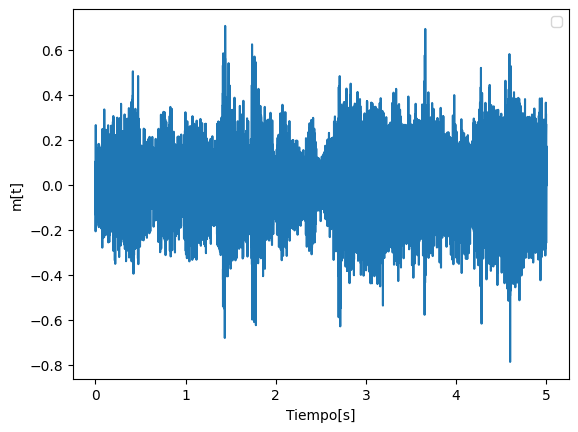

In [ ]:
#Señal mensaje en tiempo y frecuencia
tt = np.arange(0,len(m))/fs # vector de tiempo
plt.plot(tt,m) #graficar señal mensaje en el tiempo
plt.xlabel('Tiempo[s]')
plt.ylabel('m[t]')
plt.legend()
plt.show()

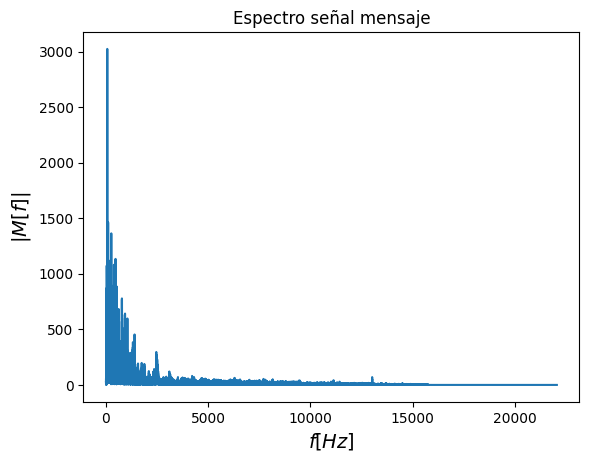

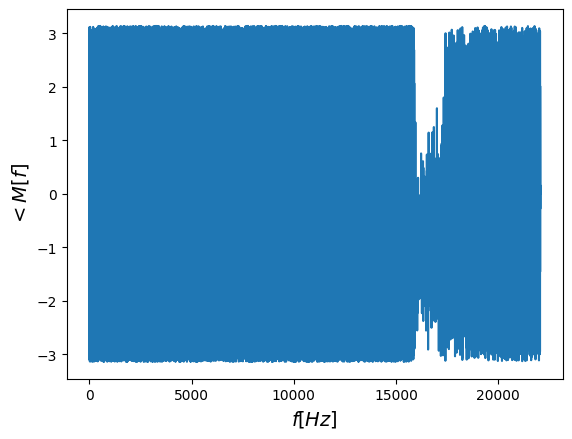

In [ ]:
#Fourier señal mensaje
Mw = np.fft.rfft(m) # axis=0 permite aplicar fft por cada columna de xpro
vf = np.fft.rfftfreq(m.shape[0],1/fs) #se crea el vector de frecuencias
plt.plot(vf,abs(Mw))#se grafica la magnitud
plt.title(r'Espectro señal mensaje')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|M[f]|$',fontsize = 14)
plt.show()

plt.plot(vf, np.angle(Mw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<M[f]$',fontsize = 14)
plt.show()

In [ ]:
Fc = 15000 #frecuencia portadora
Im = 0.5 # Im = peak(m(t))/Ac ->  Ac = peak(m(t))/Im
Ac = max(abs(m))/Im #amplitud de la portadora según índice de modulación
c = Ac*np.sin(2*np.pi*Fc*tt) #portadora

In [ ]:
#repoducir portadora
Audio(c,rate=fs)

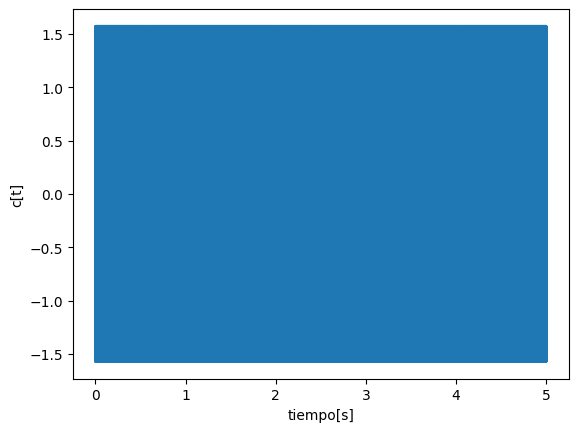

In [ ]:
#Señal portadora en tiempo y frecuencia
plt.plot(tt,c) #graficar señal mensaje en el tiempo
plt.xlabel('tiempo[s]')
plt.ylabel('c[t]')
plt.show()

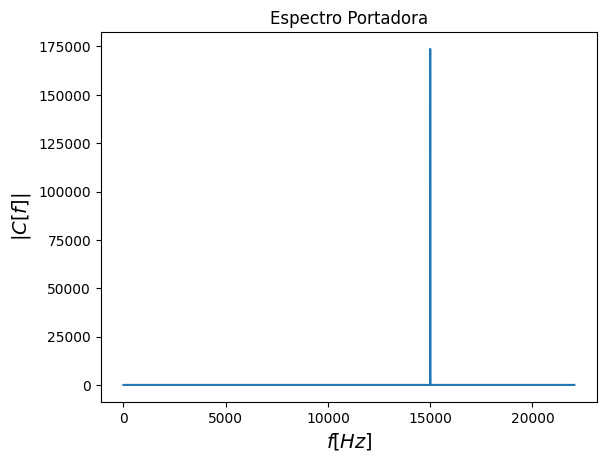

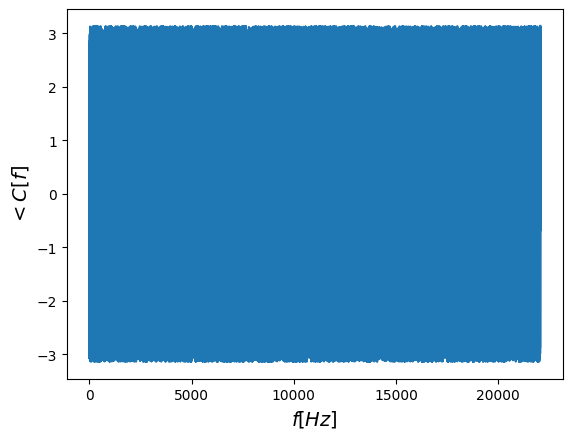

In [ ]:
#Fourier señal portadora
Cw = np.fft.rfft(c) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Cw))#se grafica la magnitud
plt.title(r'Espectro Portadora')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|C[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Cw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<C[f]$',fontsize = 14)
plt.show()

In [ ]:
#señal modulada
y = (1+m/Ac)*c #señal modulada en AM

In [ ]:
#repoducir modulada
Audio(y,rate=fs)

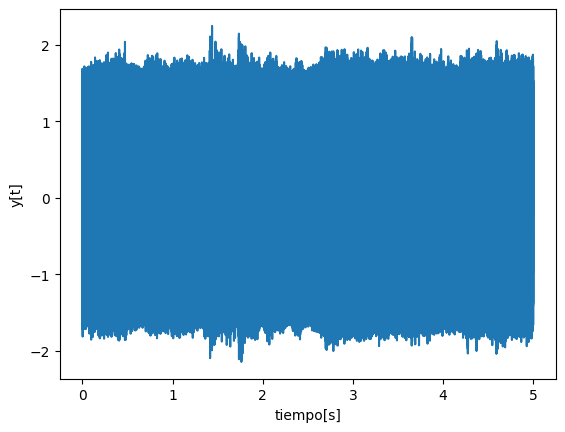

In [ ]:
plt.plot(tt,y) #graficar señal mensaje en el tiempo
plt.xlabel('tiempo[s]')
plt.ylabel('y[t]')
plt.show()

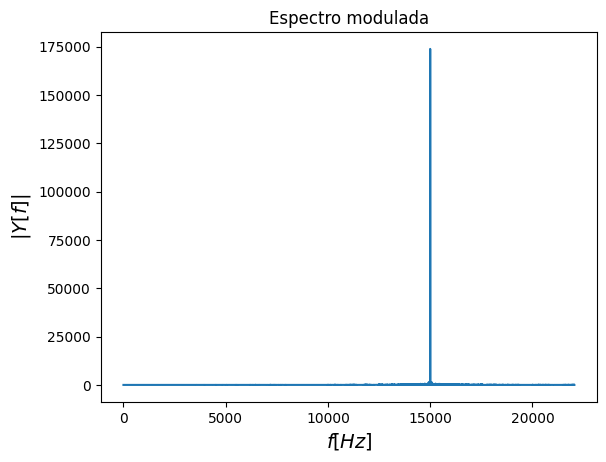

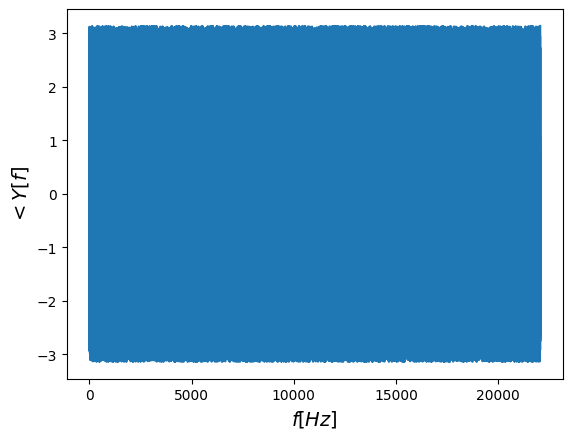

In [ ]:
#Fourier señal modulada
Yw = np.fft.rfft(y) # axis=0 permite aplicar fft por cada columna de xpro
plt.plot(vf,abs(Yw))#se grafica la magnitud
plt.title(r'Espectro modulada')
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$|Y[f]|$',fontsize = 14)
plt.show()


plt.plot(vf, np.angle(Yw))#fase del espectro
plt.xlabel(r'$f[Hz]$',fontsize = 14)
plt.ylabel(r'$<Y[f]$',fontsize = 14)
plt.show()

# PUNTO 4

THD para carga resistiva: 33146.60%
THD para carga RC: 351.41%


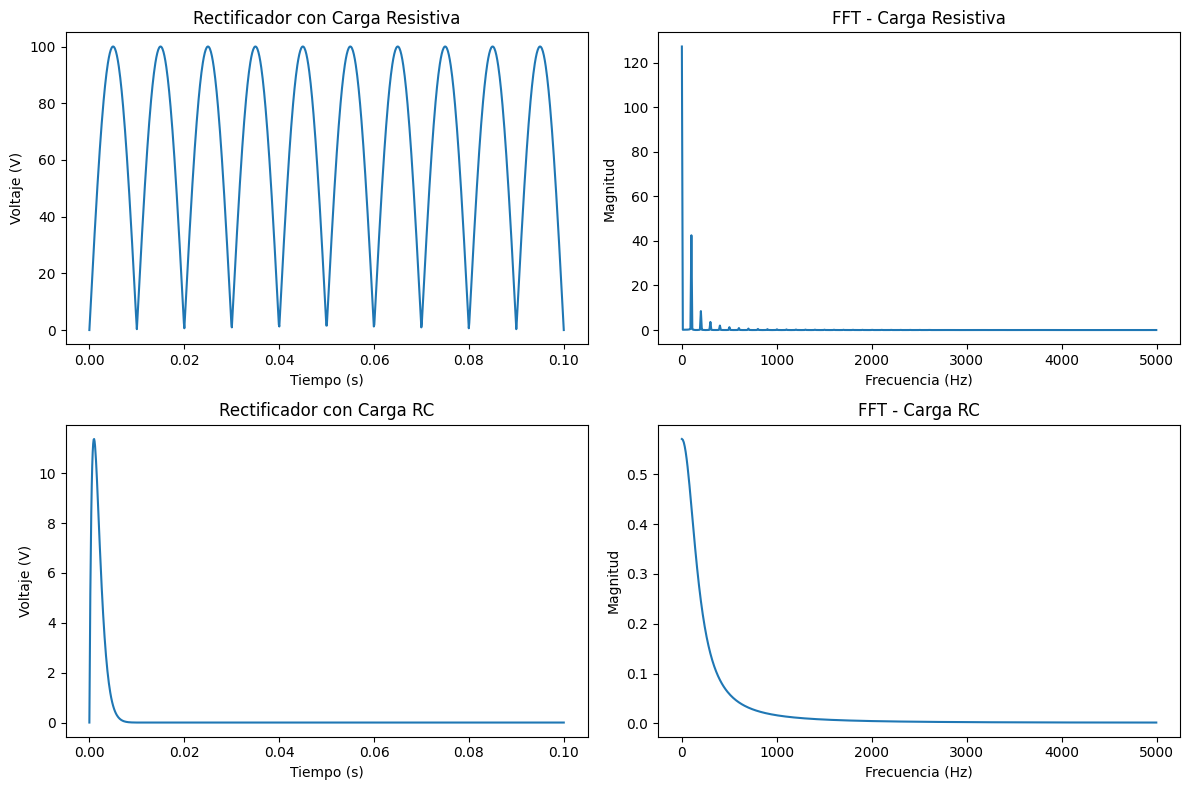

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft

# Parámetros
f = 50  # Frecuencia de la señal en Hz
R = 10  # Resistencia en ohmios
C = 100e-6  # Capacitancia en faradios
V_m = 100  # Amplitud de la señal

# Tiempo
t = np.linspace(0, 0.1, 1000)  # 0.1 segundos de simulación

# Señal de entrada (Onda senoidal)
V_in = V_m * np.sin(2 * np.pi * f * t)

# Respuesta del rectificador de onda completa con carga resistiva
V_rect_resistivo = np.abs(V_in)

# Respuesta del rectificador con carga RC
tau = R * C
V_rect_RC = np.abs(V_in) * np.exp(-t/tau)

# FFT para calcular la THD
def calculate_thd(signal, fs):
    N = len(signal)
    Y = fft(signal)
    Y = 2.0/N * np.abs(Y[:N//2])
    f = np.linspace(0.0, fs/2.0, N//2)

    fundamental = Y[1]
    harmonics = np.sqrt(np.sum(Y[2:]**2))

    THD = harmonics / fundamental
    return THD, Y, f

# THD para carga resistiva
fs = 1 / (t[1] - t[0])
THD_resistivo, Y_resistivo, f_resistivo = calculate_thd(V_rect_resistivo, fs)

# THD para carga RC
THD_RC, Y_RC, f_RC = calculate_thd(V_rect_RC, fs)

# Resultados
print(f'THD para carga resistiva: {THD_resistivo:.2%}')
print(f'THD para carga RC: {THD_RC:.2%}')

# Gráfica de las señales y sus FFT
plt.figure(figsize=(12, 8))

# Señal y FFT para carga resistiva
plt.subplot(2, 2, 1)
plt.plot(t, V_rect_resistivo)
plt.title("Rectificador con Carga Resistiva")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (V)")

plt.subplot(2, 2, 2)
plt.plot(f_resistivo, Y_resistivo)
plt.title("FFT - Carga Resistiva")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")

# Señal y FFT para carga RC
plt.subplot(2, 2, 3)
plt.plot(t, V_rect_RC)
plt.title("Rectificador con Carga RC")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (V)")

plt.subplot(2, 2, 4)
plt.plot(f_RC, Y_RC)
plt.title("FFT - Carga RC")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Magnitud")

plt.tight_layout()
plt.show()

# ENLACE A PAGINA WEB

In [ ]:
!pip install streamlit -q #instalación de librerías
!pip install pyngrok

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 42.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.2 MB/s eta 0:00:00


In [ ]:
!python3 -m pip install --force-reinstall https://github.com/yt-dlp/yt-dlp/archive/master.tar.gz
!pip install soundfile #librerias descarga Youtube y manejo de audios en python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 14.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached Brotli-1.1.0-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl.metadata (5.5 kB)
  Using cached mutagen-1.47.0-py3-none-any.whl.metadata (1.7 kB)
  Using cached pycryptodomex-3.20.0-cp35-abi3-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.4 kB)
  Using cached requests-2.32.3-py3-none-any.whl.metadata (4.6 kB)
  Using cached websockets-13.0.1-cp310-cp310-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (6.7 kB)
  Using cached charset_normalizer-3.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (33 kB)
  Using cached idna-3.8-py3-none-any.whl.metadata (9.9 kB)
Using cached requests-2.32.3-py3-none-any.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install pydub

In [ ]:
%%writefile Parcial2.py

import streamlit as st
import pandas as pd
import numpy as np
import os
import subprocess
import soundfile as sf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from pyngrok import ngrok
import yt_dlp as youtube_dl
import joblib

from scipy.fft import fft, fftfreq
from IPython.display import Audio
from pydub import AudioSegment
import io

# Intentar importar yt_dlp y manejar la falta de instalación
try:
    import yt_dlp
except ImportError:
    st.error("El módulo 'yt_dlp' no está instalado. Por favor, instálalo usando 'pip install yt-dlp'.")
    st.stop()  # Detener la ejecución si no se puede importar yt_dlp

# Descargar el audio de YouTube y convertir a WAV
def descargar_audio_youtube(url):
    ydl_opts = {
        'format': 'bestaudio[ext=m4a]',
        'outtmpl': 'audio.m4a'
    }

    with yt_dlp.YoutubeDL(ydl_opts) as ydl:
        ydl.download([url])

    # Convertir a WAV
    audio = AudioSegment.from_file("audio.m4a", format="m4a")
    audio.export("audio.wav", format="wav")
    os.remove("audio.m4a")  # Limpiar el archivo m4a temporal

# Cargar el archivo de audio
def cargar_audio(filename):
    try:
        data, sample_rate = sf.read(filename)
        return sample_rate, data
    except FileNotFoundError:
        st.error(f"No se encontró el archivo {filename}. Asegúrate de que el archivo exista y esté en la ubicación correcta.")
        return None, None

# Convertir audio estéreo a mono
def convertir_a_mono(data):
    if len(data.shape) > 1:  # Si es estéreo
        return np.mean(data, axis=1)
    return data

# Graficar la señal en el tiempo
def graficar_senal_tiempo(t, signal, title, xlabel, ylabel):
    plt.figure(figsize=(10, 4))
    plt.plot(t, signal)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid()
    st.pyplot()

# Graficar la transformada de Fourier
def graficar_fft(t, signal, title):
    N = len(signal)
    T = t[1] - t[0]
    yf = fft(signal)
    xf = fftfreq(N, T)[:N // 2]

    plt.figure(figsize=(10, 4))
    plt.plot(xf, np.abs(yf[0:N // 2]))
    plt.title(title)
    plt.xlabel('Frecuencia [Hz]')
    plt.ylabel('Magnitud')
    plt.grid()
    st.pyplot()

# Función principal de la app Streamlit
def main():
    st.title('Simulación de Modulación por Amplitud (AM)')

    url = st.text_input("Introduce el enlace del video de YouTube")

    if url:
        st.write("Descargando audio de YouTube...")
        descargar_audio_youtube(url)

        # Cargar el archivo de audio convertido
        sample_rate, data = cargar_audio("audio.wav")
        if data is None:
            return  # Salir si el archivo no se encuentra

        # Convertir a mono si es estéreo
        data_segment = convertir_a_mono(data)

        # Leer un fragmento de 5 segundos del archivo de audio
        ti = 20  # tiempo de inicio en segundos
        tf = 25   # tiempo final en segundos
        data_segment = data_segment[int(ti * sample_rate):int(tf * sample_rate)]

        # Tiempo de la señal
        t = np.arange(len(data_segment)) / sample_rate

        # Mostrar la señal de audio original
        st.subheader('Señal de Audio Original')
        graficar_senal_tiempo(t, data_segment, 'Señal de Audio en el Tiempo', 'Tiempo [s]', 'Amplitud')

        # Transformada de Fourier de la señal de audio
        st.subheader('Transformada de Fourier de la Señal de Audio')
        graficar_fft(t, data_segment, 'Espectro de la Señal de Audio')

        # Parámetros de la portadora
        Fc = st.number_input('Frecuencia de la portadora (Hz)', value=15000)
        Im = st.slider('Índice de Modulación', 0.0, 1.0, 0.5)

        # Cálculo de la señal portadora y modulada
        Ac = np.max(np.abs(data_segment)) / Im
        c = Ac * np.sin(2 * np.pi * Fc * t)
        y = (1 + Im * data_segment / Ac) * c

        # Mostrar la señal portadora
        st.subheader('Señal Portadora')
        graficar_senal_tiempo(t, c, 'Señal Portadora en el Tiempo', 'Tiempo [s]', 'Amplitud')

        # Transformada de Fourier de la señal portadora
        st.subheader('Transformada de Fourier de la Señal Portadora')
        graficar_fft(t, c, 'Espectro de la Señal Portadora')

        # Mostrar la señal modulada
        st.subheader('Señal Moduladora AM')
        graficar_senal_tiempo(t, y, 'Señal Moduladora AM en el Tiempo', 'Tiempo [s]', 'Amplitud')

        # Transformada de Fourier de la señal modulada
        st.subheader('Transformada de Fourier de la Señal Modulada')
        graficar_fft(t, y, 'Espectro de la Señal Modulada')

        # Reproducción de audio
        st.subheader('Reproducción de Audio')

        # Convertir el segmento de datos a WAV en un buffer de BytesIO
        wav_buffer = io.BytesIO()
        sf.write(wav_buffer, data_segment, sample_rate, format='wav')
        wav_buffer.seek(0)  # Reiniciar el puntero del buffer

        st.audio(wav_buffer, format='audio/wav')

        os.remove("audio.wav")

if __name__ == "__main__":
    main()

Writing Parcial2.py


In [ ]:
token = '2lLjHoDPtNqGFhA3XCMXaV7TSzC_2WMetgXt54NgDAv4qBuZE' #colocar aquí su token personal después de crear su cuenta con correo UNAL en Ngrok

In [ ]:
from pyngrok import ngrok

# Set authentication token (unique per user)
ngrok.set_auth_token(token)

# Start Streamlit server on a specific port
!nohup streamlit run Parcial2.py --server.port 8499 &

# Start ngrok tunnel to expose the Streamlit server
ngrok_tunnel = ngrok.connect(addr='8499', proto='http', bind_tls=True)

# Print the URL of the ngrok tunnel
print(' * Tunnel URL:', ngrok_tunnel.public_url)

nohup: appending output to 'nohup.out'
 * Tunnel URL: https://6f22-34-23-255-50.ngrok-free.app


In [ ]:
#exit("Stopping the execution")